This notebook will be used to test that the output of the fittit functions with multiple harmonic constituents is working correctly by using known values as inputs and getting them as a results.

In [3]:
import os
import glob
import datetime
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import angles

import netCDF4 as nc
from scipy.optimize import curve_fit
from salishsea_tools import (viz_tools,tidetools as tt, nc_tools, ellipse)
from salishsea_tools.nowcast import (research_VENUS, analyze)

%matplotlib inline

##The constants

In [127]:
x = np.arange(0,58*24,.5)

M2amp = 4
M2pha = 0

K1amp = 4
K1pha = 50

S2amp = 3
S2pha = 100

O1amp = 3
O1pha = 150

N2amp = 2
N2pha = 200

P1amp = 2
P1pha = 250

K2amp = 1
K2pha = 300

Q1amp = 1
Q1pha = 350

In [128]:
u = ((M2amp * np.cos((ellipse.CorrTides['M2']['freq'] * x - M2pha) * np.pi / 180)) +
    (K1amp * np.cos((ellipse.CorrTides['K1']['freq'] * x - K1pha) * np.pi / 180)) + 
    (S2amp * np.cos((ellipse.CorrTides['S2']['freq'] * x - S2pha) * np.pi / 180)) +
    (O1amp * np.cos((ellipse.CorrTides['O1']['freq'] * x - O1pha) * np.pi / 180)) +
    (N2amp * np.cos((ellipse.CorrTides['N2']['freq'] * x - N2pha) * np.pi / 180)) +
    (P1amp * np.cos((ellipse.CorrTides['P1']['freq'] * x - P1pha) * np.pi / 180)) +
    (K2amp * np.cos((ellipse.CorrTides['K2']['freq'] * x - K2pha) * np.pi / 180)) +
    (Q1amp * np.cos((ellipse.CorrTides['Q1']['freq'] * x - Q1pha) * np.pi / 180)))
v = x

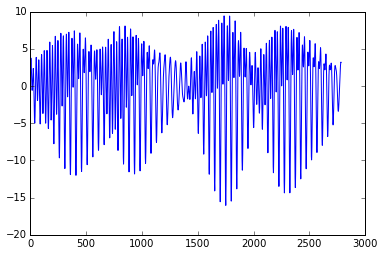

In [129]:
plt.plot(u)

Now let's run fittit and see if we get the same function for the output

In [130]:
U2 = ellipse.fittit(u, x, 2)
V2 = ellipse.fittit(v, x, 2)

U4 = ellipse.fittit(u, x, 4)
V4 = ellipse.fittit(v, x, 4)

U6 = ellipse.fittit(u, x, 6)
V6 = ellipse.fittit(v, x, 6)

U8 = ellipse.fittit(u, x, 8)
V8 = ellipse.fittit(v, x, 8)

In [131]:
U2['M2'], U2['K1']

({'amp': 3.93304108014385, 'phase': -2.4984631923799698},
 {'amp': 3.8680693589277353, 'phase': 26.246406453481129})

In [132]:
U4['M2'], U4['K1'], U4['S2'], U4['O1']

({'amp': 3.9144403139226855, 'phase': -2.0075275174246356},
 {'amp': 4.0204633079209398, 'phase': 25.778719578476206},
 {'amp': 2.3717342044939644, 'phase': 112.7104403381738},
 {'amp': 3.0194196037867185, 'phase': 147.42346588164156})

In [133]:
U6['M2'], U6['K1'], U6['S2'], U6['O1'], U6['N2'], U6['P1']

({'amp': 3.9869916946549688, 'phase': -0.8670302226636909},
 {'amp': 4.126523105221251, 'phase': 49.902486765927911},
 {'amp': 2.3849775439989003, 'phase': 112.26628899529032},
 {'amp': 2.9729760056230199, 'phase': 149.52313229656502},
 {'amp': 2.0268542733719102, 'phase': -159.42557608711547},
 {'amp': 2.0179219467899858, 'phase': -112.93182308882803})

In [134]:
U8['M2'], U8['K1'], U8['S2'], U8['O1'], U8['N2'], U8['P1'], U8['K2'], U8['Q1']

({'amp': 3.999999999953229, 'phase': 4.394260474755259e-07},
 {'amp': 4.0000000001965219, 'phase': 50.000000010818084},
 {'amp': 3.0000000065269719, 'phase': 99.999999958987303},
 {'amp': 2.9999999999809508, 'phase': 150.00000000445993},
 {'amp': 2.0000000007779279, 'phase': -159.99999997475373},
 {'amp': 2.0000000008915091, 'phase': -110.00000000215591},
 {'amp': 1.0000000069102843, 'phase': -59.999999867564952},
 {'amp': 0.99999999984376897, 'phase': -10.000000013475793})

When we are resolving for the 8 constitutents fittit works better.
With a very long time series fittit can seperate the different constituents and we obtain comparable values to the input.

In [135]:
ufit = ((U8['M2']['amp'] * np.cos((ellipse.CorrTides['M2']['freq'] * x - U8['M2']['phase']) * np.pi / 180)) +
    (U8['K1']['amp']  * np.cos((ellipse.CorrTides['K1']['freq'] * x - U8['K1']['phase']) * np.pi / 180)) + 
    (U8['S2']['amp']  * np.cos((ellipse.CorrTides['S2']['freq'] * x - U8['S2']['phase']) * np.pi / 180)) +
    (U8['O1']['amp']  * np.cos((ellipse.CorrTides['O1']['freq'] * x - U8['O1']['phase']) * np.pi / 180)) +
    (U8['N2']['amp']  * np.cos((ellipse.CorrTides['N2']['freq'] * x - U8['N2']['phase']) * np.pi / 180)) +
    (U8['P1']['amp']  * np.cos((ellipse.CorrTides['P1']['freq'] * x - U8['P1']['phase']) * np.pi / 180)) +
    (U8['K2']['amp']  * np.cos((ellipse.CorrTides['K2']['freq'] * x - U8['K2']['phase']) * np.pi / 180)) +
    (U8['Q1']['amp']  * np.cos((ellipse.CorrTides['Q1']['freq'] * x - U8['Q1']['phase']) * np.pi / 180)))

#Plotting both the input and the output

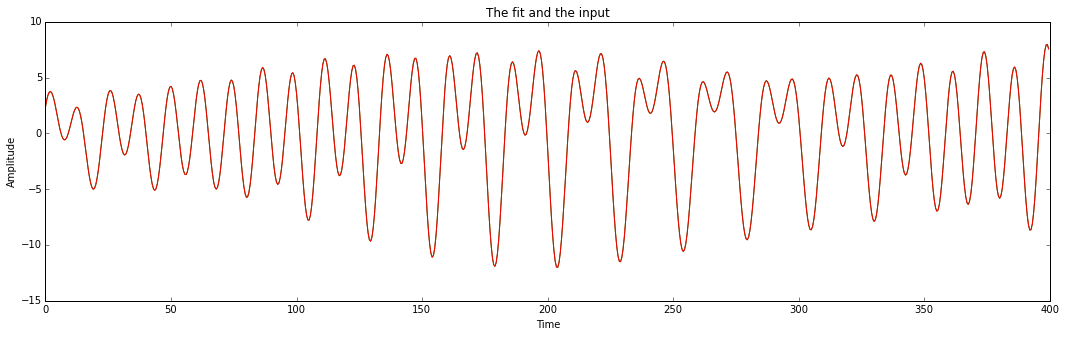

In [141]:
plt.figure(figsize=(18,5))
plt.plot(x[0:800], u[0:800], 'g', x[0:800], ufit[0:800], 'r')
plt.title('The fit and the input')
plt.ylabel('Amplitude')
plt.xlabel('Time')

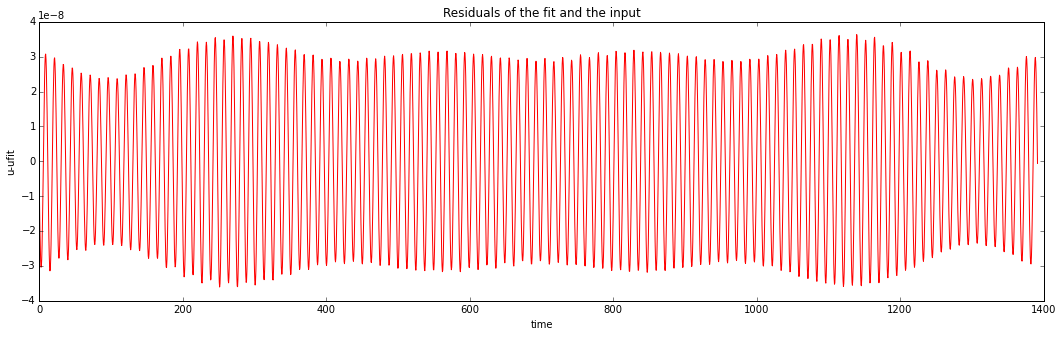

In [142]:
plt.figure(figsize=(18,5))
plt.plot(x, (u - ufit), 'r')
plt.title('Residuals of the fit and the input')
plt.ylabel('u-ufit')
plt.xlabel('time')